### Loading Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler

### Loading Datasets

In [2]:
data = pd.read_csv('merged_nhanes_all_years.csv')

### Understanding Dataset

In [4]:
data.shape

(27706, 21)

In [5]:
list(data.columns.values)

['SEQN',
 'LBXGLU',
 'LBXIN',
 'LBXSBU',
 'LBXSCR',
 'LBXSATSI',
 'SMQ020',
 'SMQ040',
 'EverDrank',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'RIDAGEYR',
 'RIAGENDR',
 'DMDEDUC2',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ050',
 'DIQ070',
 'SurveyCycle',
 'URDACT']

In [6]:
unique_SEQN_count = data['SEQN'].nunique()
print("Number of unique IDs:", unique_SEQN_count)

Number of unique IDs: 27706


In [8]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [11]:
def create_data_dictionary(data):
    data_dict = {
        "Feature Name": [],
        "Data Type": [],
        "Missing Values": [],
        "Unique Values": [],
        "Description": [],
    }

    # Feature descriptions for your current dataset
    feature_descriptions = {
        "SEQN": "Respondent sequence number (unique ID for each participant)",
        "LBXGLU": "Fasting glucose (mg/dL)",
        "LBXIN": "Fasting insulin (μU/mL)",
        "LBXSBU": "Blood urea nitrogen (BUN) (mg/dL), marker of kidney function",
        "LBXSCR": "Serum creatinine (mg/dL), used to assess kidney function",
        "LBXSATSI": "Serum sodium concentration (mmol/L)",
        "URDACT": "Urine albumin-to-creatinine ratio (mg/g), marker of early kidney damage",
        "URXUMA": "Urine albumin (μg/mL)",
        "URXUCR": "Urine creatinine (mg/dL)",
        "SMQ020": "Ever smoked at least 100 cigarettes in life (1 = Yes, 2 = No)",
        "SMQ040": "Current smoking status (1 = Every day, 2 = Some days, 3 = Not at all)",
        "ALQ111": "Ever had at least one alcoholic drink (1 = Yes, 2 = No)",
        "ALQ121": "Drinking frequency over past 12 months",
        "ALQ130": "Average number of alcoholic drinks per day (past 12 months)",
        "RIAGENDR": "Gender (1 = Male, 2 = Female)",
        "RIDAGEYR": "Age in years at time of screening",
        "DMDEDUC2": "Education level (1 = Less than 9th grade to 5 = College graduate or above)",
        "INDFMPIR": "Ratio of family income to poverty level (higher = higher income)",
        "DIQ010": "Doctor told you have diabetes (1 = Yes, 2 = No)",
        "DID040": "Age when first told you had diabetes",
        "DIQ050": "Currently taking insulin (1 = Yes, 2 = No)",
        "DIQ070": "Currently taking pills to lower blood sugar (1 = Yes, 2 = No)",
        "SurveyCycle": "NHANES survey cycle years"
    }

    # Loop through each column in the DataFrame
    for column in data.columns:
        data_dict["Feature Name"].append(column)
        data_dict["Data Type"].append(data[column].dtype)
        data_dict["Missing Values"].append(data[column].isnull().sum())
        data_dict["Unique Values"].append(data[column].nunique())
        data_dict["Description"].append(feature_descriptions.get(column, "No description available"))

    return pd.DataFrame(data_dict)
# Optional: remove a column if it exists
data = data.drop(columns=['Calculated_Diff'], errors='ignore')

# Create and view the data dictionary
data_dict_df = create_data_dictionary(data)
data_dict_df

,Feature Name,Data Type,Missing Values,Unique Values,Description
0,SEQN,float64,0,27706,Respondent sequence number (unique ID for each...
1,LBXGLU,float64,1489,1332,Fasting glucose (mg/dL)
2,LBXIN,float64,2015,4210,Fasting insulin (μU/mL)
3,LBXSBU,float64,1801,75,"Blood urea nitrogen (BUN) (mg/dL), marker of k..."
4,LBXSCR,float64,1800,317,"Serum creatinine (mg/dL), used to assess kidne..."
5,LBXSATSI,float64,1826,210,Serum sodium concentration (mmol/L)
6,SMQ020,float64,140,4,Ever smoked at least 100 cigarettes in life (1...
7,SMQ040,float64,15294,3,"Current smoking status (1 = Every day, 2 = Som..."
8,EverDrank,float64,17061,3,No description available
9,DrinkFrequency,float64,6055,82,No description available


In [12]:
data.info()
data.describe()

missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27706 entries, 0 to 27705
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             27706 non-null  float64
 1   LBXGLU           26217 non-null  float64
 2   LBXIN            25691 non-null  float64
 3   LBXSBU           25905 non-null  float64
 4   LBXSCR           25906 non-null  float64
 5   LBXSATSI         25880 non-null  float64
 6   SMQ020           27566 non-null  float64
 7   SMQ040           12412 non-null  float64
 8   EverDrank        10645 non-null  float64
 9   DrinkFrequency   21651 non-null  float64
 10  AvgDrinksPerDay  16688 non-null  float64
 11  RIDAGEYR         27706 non-null  float64
 12  RIAGENDR         27706 non-null  float64
 13  DMDEDUC2         27078 non-null  float64
 14  INDFMPIR         25038 non-null  float64
 15  DIQ010           27706 non-null  float64
 16  DID040           3383 non-null   float64
 17  DIQ050      

In [13]:
df = data[data['DIQ010'].isin([1, 2])].copy()
print("Rows after filtering valid diabetes status:", df.shape[0])

Rows after filtering valid diabetes status: 27138


In [14]:
t2d_counts = df['DIQ010'].value_counts().rename(index={1: 'Has Diabetes', 2: 'No Diabetes'})
print("\nNumber of participants by diabetes status:")
print(t2d_counts)


Number of participants by diabetes status:
No Diabetes     23753
Has Diabetes     3385
Name: DIQ010, dtype: int64


In [15]:
def is_likely_type1(row):
    return (
        row['DIQ010'] == 1 and
        pd.notnull(row['DID040']) and row['DID040'] < 30 and
        row['DIQ050'] == 1 and
        (row['DIQ070'] == 2 or pd.isnull(row['DIQ070']))
    )

# Flag and remove likely type 1 cases
df['likely_type1'] = df.apply(is_likely_type1, axis=1)
print(f"Likely Type 1 cases flagged: {df['likely_type1'].sum()}")

# Keep everyone except those flagged
df = df[~df['likely_type1']].copy()
print("Final dataset size after removing likely T1D:", df.shape[0])

Likely Type 1 cases flagged: 173
Final dataset size after removing likely T1D: 26965


In [16]:
t2d_count = df[df['DIQ010'] == 1].shape[0]
print(f"Number of Type 2 Diabetes cases: {t2d_count}")

Number of Type 2 Diabetes cases: 3212


In [17]:
df.describe()

,SEQN,LBXGLU,LBXIN,LBXSBU,LBXSCR,LBXSATSI,SMQ020,SMQ040,EverDrank,DrinkFrequency,AvgDrinksPerDay,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,DIQ010,DID040,DIQ050,DIQ070,URDACT
count,26965.000000,25532.000000,25018.000000,25214.000000,25215.000000,25189.000000,26827.000000,12051.000000,10303.000000,21073.000000,16304.000000,26965.000000,26965.000000,26346.000000,24379.000000,26965.000000,3210.000000,22735.000000,4462.000000,26340.000000
mean,59738.953495,107.530146,13.630298,13.586658,0.880420,24.957164,1.557274,2.170027,1.354363,4.767190,3.967738,49.042870,1.518487,3.334434,2.516986,1.880883,49.931776,1.965692,1.449574,50.102268
std,35084.057569,35.175935,16.856420,5.984526,0.457576,26.658258,0.545094,0.941642,0.547246,30.817437,33.788423,18.544808,0.499667,1.308777,1.622195,0.323933,90.534134,0.195088,0.600410,380.581416
min,2.000000,38.000000,0.140000,1.000000,0.200000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.122093
25%,30996.000000,92.000000,6.200000,10.000000,0.700000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,2.000000,1.110000,2.000000,32.000000,2.000000,1.000000,4.517586
50%,58211.000000,99.000000,9.700000,13.000000,0.820000,20.000000,2.000000,3.000000,1.000000,2.000000,2.000000,48.000000,2.000000,4.000000,2.130000,2.000000,48.000000,2.000000,1.000000,7.069483
75%,84457.000000,109.000000,15.820000,16.000000,1.000000,28.000000,2.000000,3.000000,2.000000,5.000000,3.000000,64.000000,2.000000,4.000000,4.060000,2.000000,59.000000,2.000000,2.000000,14.021711
max,124822.000000,587.300000,647.500000,98.000000,17.410000,1997.000000,9.000000,3.000000,9.000000,999.000000,999.000000,85.000000,2.000000,9.000000,5.000000,2.000000,999.000000,9.000000,9.000000,16636.363636


In [18]:
df = df.rename(columns={
    'LBXGLU': 'FastingGlucose',
    'LBXIN': 'FastingInsulin',
    'LBXSBU': 'BUN',
    'LBXSCR': 'SerumCreatinine',
    'URDACT': 'ACR',
    'URXUMA': 'UrineAlbumin',
    'URXUCR': 'UrineCreatinine',
    'SMQ020': 'EverSmoked100',
    'SMQ040': 'CurrentSmoker',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'DMDEDUC2': 'Education',
    'INDFMPIR': 'IncomeToPovertyRatio',
    'DIQ010': 'HasDiabetes'
})

In [20]:
list(df.columns.values)

['SEQN',
 'FastingGlucose',
 'FastingInsulin',
 'BUN',
 'SerumCreatinine',
 'LBXSATSI',
 'EverSmoked100',
 'CurrentSmoker',
 'EverDrank',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'HasDiabetes',
 'DID040',
 'DIQ050',
 'DIQ070',
 'SurveyCycle',
 'ACR',
 'likely_type1']

In [23]:
df_t2d = df[df['HasDiabetes'] == 1].copy()
print(f"Number of participants with Type 2 Diabetes: {df_t2d.shape[0]}")

Number of participants with Type 2 Diabetes: 3212


In [24]:
df_t2d['T2D'] = 1 
df_t2d.shape

(3212, 23)

### Handeling Missing Values

In [25]:
missing_values = df_t2d.isnull().sum()
missing_percent = (missing_values / len(df_t2d)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])


Missing data summary:
                      Missing Values  Missing %
FastingGlucose                   171       5.32
FastingInsulin                   256       7.97
BUN                              240       7.47
SerumCreatinine                  241       7.50
LBXSATSI                         245       7.63
CurrentSmoker                   1603      49.91
EverDrank                       1645      51.21
DrinkFrequency                   778      24.22
AvgDrinksPerDay                 1810      56.35
Education                          2       0.06
IncomeToPovertyRatio             365      11.36
DID040                             2       0.06
DIQ070                             1       0.03
ACR                              119       3.70


In [26]:
df_t2d[['EverDrank', 'DrinkFrequency', 'AvgDrinksPerDay']].value_counts(dropna=False)

EverDrank  DrinkFrequency  AvgDrinksPerDay
2.0        NaN             NaN                536
1.0        0.0             NaN                519
NaN        0.0             NaN                513
           NaN             NaN                237
           1.0             1.0                123
                                             ... 
1.0        6.0             4.0                  1
           5.0             15.0                 1
                           8.0                  1
NaN        10.0            5.0                  1
           9.0             6.0                  1
Length: 181, dtype: int64

In [27]:
# Set alcohol frequency/amount to 0 for those who never drank
df_t2d.loc[df_t2d['EverDrank'] == 2, ['DrinkFrequency', 'AvgDrinksPerDay']] = 0

# Set drink amount to 0 for rare drinkers (e.g., frequency 0)
df_t2d.loc[(df_t2d['EverDrank'] == 1) & (df_t2d['DrinkFrequency'] == 0), 'AvgDrinksPerDay'] = 0

# Fill truly missing EverDrank with "non-drinker" (or 0)
df_t2d['EverDrank'] = df_t2d['EverDrank'].fillna(2)
df_t2d['DrinkFrequency'] = df_t2d['DrinkFrequency'].fillna(0)
df_t2d['AvgDrinksPerDay'] = df_t2d['AvgDrinksPerDay'].fillna(0)

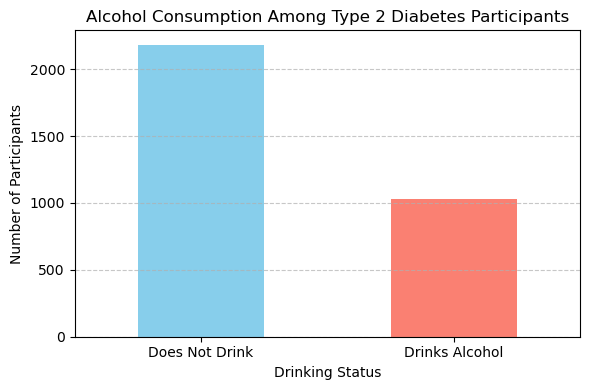

In [28]:
df_t2d['EverDrank_Label'] = df_t2d['EverDrank'].map({1: 'Drinks Alcohol', 2: 'Does Not Drink'})
drink_counts = df_t2d['EverDrank_Label'].value_counts()
plt.figure(figsize=(6, 4))
drink_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Alcohol Consumption Among Type 2 Diabetes Participants')
plt.ylabel('Number of Participants')
plt.xlabel('Drinking Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
missing_values = df_t2d.isnull().sum()
missing_percent = (missing_values / len(df_t2d)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])


Missing data summary:
                      Missing Values  Missing %
FastingGlucose                   171       5.32
FastingInsulin                   256       7.97
BUN                              240       7.47
SerumCreatinine                  241       7.50
LBXSATSI                         245       7.63
CurrentSmoker                   1603      49.91
Education                          2       0.06
IncomeToPovertyRatio             365      11.36
DID040                             2       0.06
DIQ070                             1       0.03
ACR                              119       3.70
EverDrank_Label                    5       0.16


In [30]:
df_t2d['FastingGlucose'] = df_t2d['FastingGlucose'].fillna(df_t2d['FastingGlucose'].median())

In [31]:
df_t2d['FastingInsulin'] = df_t2d['FastingInsulin'].fillna(df_t2d['FastingInsulin'].median())

In [32]:
df_t2d['BUN'] = df_t2d['BUN'].fillna(df_t2d['BUN'].median())
df_t2d['SerumCreatinine'] = df_t2d['SerumCreatinine'].fillna(df_t2d['SerumCreatinine'].median())

In [33]:
df_t2d['ACR'] = df_t2d['ACR'].fillna(df_t2d['ACR'].median())

In [34]:
df_t2d.loc[(df_t2d['CurrentSmoker'].isnull()) & (df_t2d['EverSmoked100'] == 2), 'CurrentSmoker'] = 'Not at all'
df_t2d['CurrentSmoker'] = df_t2d['CurrentSmoker'].fillna('Missing')

In [35]:
df_t2d['Education'] = df_t2d['Education'].fillna(df_t2d['Education'].mode()[0])

In [36]:
df_t2d['IncomeMissing'] = df_t2d['IncomeToPovertyRatio'].isnull().astype(int)
df_t2d['IncomeToPovertyRatio'] = df_t2d['IncomeToPovertyRatio'].fillna(df_t2d['IncomeToPovertyRatio'].median())

In [37]:
df_t2d.drop(columns=['DID040'], inplace=True)

In [38]:
missing_values = df_t2d.isnull().sum()
missing_percent = (missing_values / len(df_t2d)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])


Missing data summary:
                 Missing Values  Missing %
LBXSATSI                    245       7.63
DIQ070                        1       0.03
EverDrank_Label               5       0.16


In [43]:
median_sodium = df_t2d['LBXSATSI'].median()
df_t2d['LBXSATSI'].fillna(median_sodium, inplace=True)

In [44]:
mode_diq070 = df_t2d['DIQ070'].mode()[0]
df_t2d['DIQ070'].fillna(mode_diq070, inplace=True)

In [45]:
mode_drink = df_t2d['EverDrank_Label'].mode()[0]
df_t2d['EverDrank_Label'].fillna(mode_drink, inplace=True)

In [46]:
missing_values = df_t2d.isnull().sum()
missing_percent = (missing_values / len(df_t2d)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
print("\nMissing data summary:")
print(missing_df[missing_df['Missing Values'] > 0])


Missing data summary:
Empty DataFrame
Columns: [Missing Values, Missing %]
Index: []


### Feature Engineering

In [47]:
df_t2d['HOMA_B'] = (20 * df_t2d['FastingInsulin']) / (df_t2d['FastingGlucose'] - 3.5)

In [48]:
categorical_cols = df_t2d.select_dtypes(include='object').columns
print(categorical_cols)

df_t2d = pd.get_dummies(df_t2d, columns=categorical_cols, drop_first=True)

Index(['CurrentSmoker', 'SurveyCycle', 'EverDrank_Label'], dtype='object')


In [49]:
df_t2d.shape

(3212, 36)

In [50]:
list(df_t2d.columns.values)

['SEQN',
 'FastingGlucose',
 'FastingInsulin',
 'BUN',
 'SerumCreatinine',
 'LBXSATSI',
 'EverSmoked100',
 'EverDrank',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'HasDiabetes',
 'DIQ050',
 'DIQ070',
 'ACR',
 'likely_type1',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'CurrentSmoker_2.0',
 'CurrentSmoker_3.0',
 'CurrentSmoker_Missing',
 'CurrentSmoker_Not at all',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol']

In [51]:
def calculate_egfr(creat, age, sex):
    # Convert to female = 0, male = 1
    is_male = (sex == 1)
    
    k = 0.7 if not is_male else 0.9
    a = -0.241 if not is_male else -0.302
    alpha = (creat / k) ** a
    min_part = min(creat / k, 1) ** a
    max_part = max(creat / k, 1) ** -1.200

    # Coefficient: 142 for males, 144 for females
    factor = 142 if is_male else 144
    egfr = factor * min_part * max_part * (0.9938 ** age)
    return egfr

# Apply to your dataset
df_t2d['eGFR'] = df_t2d.apply(
    lambda row: calculate_egfr(row['SerumCreatinine'], row['Age'], row['Gender']), axis=1
)

In [52]:
df_t2d = df_t2d[df_t2d['eGFR'] >= 30].copy()
print(f"Remaining rows after eGFR filtering: {df_t2d.shape[0]}")

Remaining rows after eGFR filtering: 3113


In [53]:
df_t2d.shape

(3113, 37)

In [54]:
df_t2d.to_csv('updated_cleaned_dataset_2.csv', index=False)

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('updated_cleaned_dataset_2.csv')

In [6]:
def create_data_dictionary(data):
    data_dict = {
        "Feature Name": [],
        "Data Type": [],
        "Missing Values": [],
        "Unique Values": [],
        "Description": [],
    }

    # Feature descriptions for your current dataset
    feature_descriptions = {
        "SEQN": "Respondent sequence number (unique ID for each participant)",
        "FastingGlucose": "Fasting glucose level (mg/dL)",
        "FastingInsulin": "Fasting insulin level (μU/mL)",
        "BUN": "Blood urea nitrogen (mg/dL), marker of kidney function",
        "SerumCreatinine": "Serum creatinine (mg/dL), used to estimate kidney function",
        "LBXSATSI": "Serum sodium concentration (mmol/L)",
        "EverSmoked100": "Ever smoked at least 100 cigarettes in life (1 = Yes, 2 = No)",
        "EverDrank": "Ever had at least one alcoholic drink (1 = Yes, 2 = No)",
        "DrinkFrequency": "Drinking frequency over past 12 months (0 = Rare/Never)",
        "AvgDrinksPerDay": "Average number of alcoholic drinks per day over past 12 months",
        "Age": "Age in years at time of screening",
        "Gender": "Gender (1 = Male, 2 = Female)",
        "Education": "Education level (1 = Less than 9th grade to 5 = College graduate or above)",
        "IncomeToPovertyRatio": "Ratio of family income to poverty level",
        "HasDiabetes": "Has doctor-diagnosed diabetes (1 = Yes, 2 = No)",
        "DIQ050": "Currently taking insulin (1 = Yes, 2 = No)",
        "DIQ070": "Currently taking diabetes pills (1 = Yes, 2 = No)",
        "ACR": "Urine albumin-to-creatinine ratio (mg/g), marker of kidney damage",
        "likely_type1": "Flag for likely type 1 diabetes (True/False)",
        "T2D": "Type 2 diabetes classification (1 = Yes, 0 = No)",
        "IncomeMissing": "Flag if income data is missing (True/False)",
        "HOMA_B": "Homeostatic Model Assessment of Beta-cell function (HOMA-B)",
        "CurrentSmoker_2.0": "Current smoking status: some days (dummy variable)",
        "CurrentSmoker_3.0": "Current smoking status: not at all (dummy variable)",
        "CurrentSmoker_Missing": "Current smoking status missing (dummy variable)",
        "CurrentSmoker_Not at all": "Current smoking status labeled 'Not at all'",
        "SurveyCycle_2001-2002": "Survey cycle dummy for 2001–2002",
        "SurveyCycle_2003-2004": "Survey cycle dummy for 2003–2004",
        "SurveyCycle_2005-2006": "Survey cycle dummy for 2005–2006",
        "SurveyCycle_2007-2008": "Survey cycle dummy for 2007–2008",
        "SurveyCycle_2009-2010": "Survey cycle dummy for 2009–2010",
        "SurveyCycle_2011-2012": "Survey cycle dummy for 2011–2012",
        "SurveyCycle_2013-2014": "Survey cycle dummy for 2013–2014",
        "SurveyCycle_2015-2016": "Survey cycle dummy for 2015–2016",
        "SurveyCycle_2017-2020": "Survey cycle dummy for 2017–2020",
        "EverDrank_Label_Drinks Alcohol": "Label indicating whether participant drinks alcohol"
    }

    for column in data.columns:
        data_dict["Feature Name"].append(column)
        data_dict["Data Type"].append(data[column].dtype)
        data_dict["Missing Values"].append(data[column].isnull().sum())
        data_dict["Unique Values"].append(data[column].nunique())
        data_dict["Description"].append(feature_descriptions.get(column, "No description available"))

    return pd.DataFrame(data_dict)

data = data.drop(columns=['Calculated_Diff'], errors='ignore')

data_dict_df = create_data_dictionary(data)
data_dict_df

,Feature Name,Data Type,Missing Values,Unique Values,Description
0,SEQN,float64,0,3113,Respondent sequence number (unique ID for each...
1,FastingGlucose,float64,0,733,Fasting glucose level (mg/dL)
2,FastingInsulin,float64,0,1948,Fasting insulin level (μU/mL)
3,BUN,float64,0,51,"Blood urea nitrogen (mg/dL), marker of kidney ..."
4,SerumCreatinine,float64,0,167,"Serum creatinine (mg/dL), used to estimate kid..."
5,LBXSATSI,float64,0,107,Serum sodium concentration (mmol/L)
6,EverSmoked100,float64,0,4,Ever smoked at least 100 cigarettes in life (1...
7,EverDrank,float64,0,3,Ever had at least one alcoholic drink (1 = Yes...
8,DrinkFrequency,float64,0,28,Drinking frequency over past 12 months (0 = Ra...
9,AvgDrinksPerDay,float64,0,18,Average number of alcoholic drinks per day ove...


In [7]:
def create_data_dictionary(data):
    data_dict = {
        "Feature Name": [],
        "Data Type": [],
        "Missing Values": [],
        "Unique Values": [],
        "Description": [],
    }

    # Feature descriptions for your current dataset
    feature_descriptions = {
        "SEQN": "Respondent sequence number (unique ID for each participant)",
        "FastingGlucose": "Fasting glucose level (mg/dL)",
        "FastingInsulin": "Fasting insulin level (μU/mL)",
        "BUN": "Blood urea nitrogen (mg/dL), marker of kidney function",
        "SerumCreatinine": "Serum creatinine (mg/dL), used to estimate kidney function",
        "LBXSATSI": "Serum sodium concentration (mmol/L)",
        "EverSmoked100": "Ever smoked at least 100 cigarettes in life (1 = Yes, 2 = No)",
        "EverDrank": "Ever had at least one alcoholic drink (1 = Yes, 2 = No)",
        "DrinkFrequency": "Drinking frequency over past 12 months (0 = Rare/Never)",
        "AvgDrinksPerDay": "Average number of alcoholic drinks per day over past 12 months",
        "Age": "Age in years at time of screening",
        "Gender": "Gender (1 = Male, 2 = Female)",
        "Education": "Education level (1 = Less than 9th grade to 5 = College graduate or above)",
        "IncomeToPovertyRatio": "Ratio of family income to poverty level",
        "HasDiabetes": "Has doctor-diagnosed diabetes (1 = Yes, 2 = No)",
        "DIQ050": "Currently taking insulin (1 = Yes, 2 = No)",
        "DIQ070": "Currently taking diabetes pills (1 = Yes, 2 = No)",
        "ACR": "Urine albumin-to-creatinine ratio (mg/g), marker of kidney damage",
        "likely_type1": "Flag for likely type 1 diabetes (True/False)",
        "T2D": "Type 2 diabetes classification (1 = Yes, 0 = No)",
        "IncomeMissing": "Flag if income data is missing (True/False)",
        "HOMA_B": "Homeostatic Model Assessment of Beta-cell function (HOMA-B)",
        "CurrentSmoker_2.0": "Current smoking status: some days (dummy variable)",
        "CurrentSmoker_3.0": "Current smoking status: not at all (dummy variable)",
        "CurrentSmoker_Missing": "Current smoking status missing (dummy variable)",
        "CurrentSmoker_Not at all": "Current smoking status labeled 'Not at all'",
        "SurveyCycle_2001-2002": "Survey cycle dummy for 2001–2002",
        "SurveyCycle_2003-2004": "Survey cycle dummy for 2003–2004",
        "SurveyCycle_2005-2006": "Survey cycle dummy for 2005–2006",
        "SurveyCycle_2007-2008": "Survey cycle dummy for 2007–2008",
        "SurveyCycle_2009-2010": "Survey cycle dummy for 2009–2010",
        "SurveyCycle_2011-2012": "Survey cycle dummy for 2011–2012",
        "SurveyCycle_2013-2014": "Survey cycle dummy for 2013–2014",
        "SurveyCycle_2015-2016": "Survey cycle dummy for 2015–2016",
        "SurveyCycle_2017-2020": "Survey cycle dummy for 2017–2020",
        "EverDrank_Label_Drinks Alcohol": "Label indicating whether participant drinks alcohol",
        "eGFR": "Estimated glomerular filtration rate (mL/min/1.73m²), a calculated measure of kidney function based on serum creatinine, age, and sex."
    }

    for column in data.columns:
        data_dict["Feature Name"].append(column)
        data_dict["Data Type"].append(data[column].dtype)
        data_dict["Missing Values"].append(data[column].isnull().sum())
        data_dict["Unique Values"].append(data[column].nunique())
        data_dict["Description"].append(feature_descriptions.get(column, "No description available"))

    return pd.DataFrame(data_dict)

data = data.drop(columns=['Calculated_Diff'], errors='ignore')

data_dict_df = create_data_dictionary(data)
data_dict_df

,Feature Name,Data Type,Missing Values,Unique Values,Description
0,SEQN,float64,0,3113,Respondent sequence number (unique ID for each...
1,FastingGlucose,float64,0,733,Fasting glucose level (mg/dL)
2,FastingInsulin,float64,0,1948,Fasting insulin level (μU/mL)
3,BUN,float64,0,51,"Blood urea nitrogen (mg/dL), marker of kidney ..."
4,SerumCreatinine,float64,0,167,"Serum creatinine (mg/dL), used to estimate kid..."
5,LBXSATSI,float64,0,107,Serum sodium concentration (mmol/L)
6,EverSmoked100,float64,0,4,Ever smoked at least 100 cigarettes in life (1...
7,EverDrank,float64,0,3,Ever had at least one alcoholic drink (1 = Yes...
8,DrinkFrequency,float64,0,28,Drinking frequency over past 12 months (0 = Ra...
9,AvgDrinksPerDay,float64,0,18,Average number of alcoholic drinks per day ove...


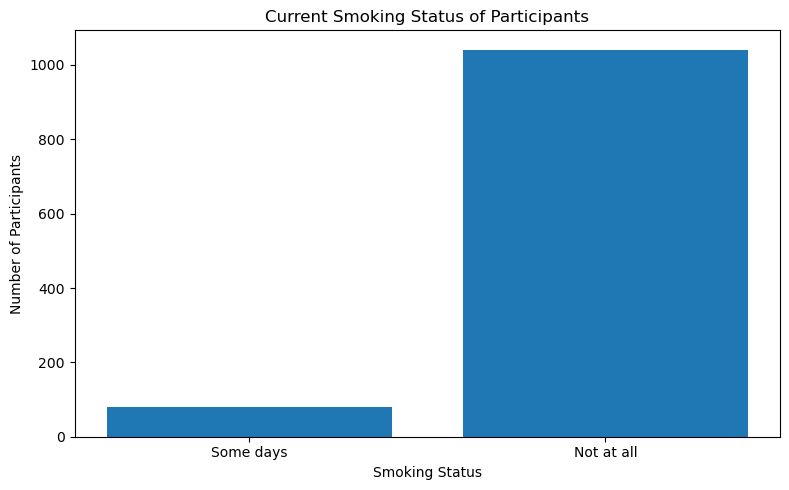

In [15]:
smoke_counts = {
    'Some days': data['CurrentSmoker_2.0'].sum(),
    'Not at all': data['CurrentSmoker_3.0'].sum(),
}

plt.figure(figsize=(8, 5))
plt.bar(smoke_counts.keys(), smoke_counts.values())
plt.title('Current Smoking Status of Participants')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('updated_cleaned_dataset_2.csv')

In [3]:
min_max_df = df.agg(['min', 'max']).T
min_max_df.columns = ['Min', 'Max']
print(min_max_df)

                                      Min           Max
SEQN                                 29.0      124803.0
FastingGlucose                       45.7         587.3
FastingInsulin                        0.2         647.5
BUN                                   2.0          59.0
SerumCreatinine                       0.2           2.5
LBXSATSI                              3.0         280.0
EverSmoked100                         1.0           9.0
EverDrank                             1.0           9.0
DrinkFrequency                        0.0         999.0
AvgDrinksPerDay                       0.0         999.0
Age                                  18.0          85.0
Gender                                1.0           2.0
Education                             1.0           9.0
IncomeToPovertyRatio                  0.0           5.0
HasDiabetes                           1.0           1.0
DIQ050                                1.0           9.0
DIQ070                                1.0       